# Gravity Survey Problem

상기 그림에서 $f(t)$는 지표면에서 d만큼 아래에서의 질량밀도이다. t축 상에서 0~1 구간에 질량이 분포해 있으며, 이 질량분포로 인해 중력장이 발생한다. 지표면 s에서 수직방향의 중력장 $g(s)$를 측정한다. 

t 지점과 s점 사이의 거리 r은 다음과 같다.

$r = \sqrt{d^2 + (s-t)^2}$

미소길이 $dt$에 위치한 질량분포 $f(t)$에 의해 지표면 s에서 발생하는 수직방향 중력장은 다음과 같다.

$\large \frac{sin\theta f(t)dt}{r^2}=\frac{d}{(d^2+(s-t)^2)^{3/2}}f(t)$

상기 식을 t의 전구간 [0,1]에 대해 적분하면 다음과 같다.

$g(s)= \int_0^1  \frac{d}{(d^2+(s-t)^2)^{3/2}} f(t) dt$

상기 식을 다음과 같이 일반화 할 수 있으며 이러한 형태를 First-kind Fredholm integral equation이라고 한다.

$\int K(s,t) f(t) dt = g(s)$

In [1]:
def K(s,t): return d/pow(d**2+(s-t)**2,3/2)

## (1) Forward Problem

다음과 같이 중력장이 주어졌다고 하자.

In [2]:
from numpy import *
import matplotlib.pyplot as plt

In [3]:
def f(t): return sin(pi*t)+0.5*sin(2*pi*t)

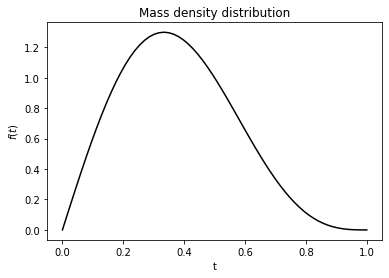

In [4]:
n = 64; t = linspace(0,1,n)
plt.plot(t,f(t),'k'); plt.xlabel('t'); plt.ylabel('$f(t)$'); plt.title('Mass density distribution');

$f(t)$와 $K(s,t)$를 알고 있으므로 $g(s)$를 계산할 수 있다. 계산을 위해 Quadrature Method (midpoint rule)을 적용해 이산화를 수행하여 AX=b의 선형대수 형태로 변형하고 b를 계산한다.

In [5]:
def Q(K,f,n=64,a=0,b=1):
    j = arange(n)+1
    t = a+(b-a)*(j-0.5)/n
    s = t
    w = (b-a)/n
    A = zeros([n,n])
    for i in range(n):
        for j in range(n):
            A[i,j] = w * K(s[i],t[j])
    x = zeros(n)
    for i in range(n):
        x[i] = f(t[i])
    b = A@x
    
    return A,x,b

깊이 d=0.25,0.5,1.0 일 때 수직성분 중력장을 계산해보면 다음과 같다.

In [6]:
d=0.25 ; A,x,b1 = Q(K,f,n=64)
d=0.50 ; _,_,b2 = Q(K,f,n=64)
d=1.00 ; _,_,b3 = Q(K,f,n=64)

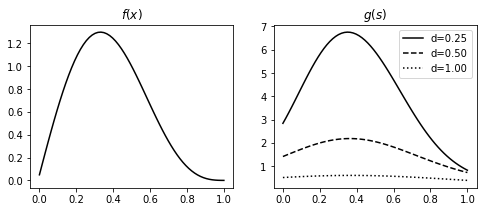

In [7]:
plt.figure(figsize=(8,3))
plt.subplot(121); plt.plot(t,x,'k'); plt.title('$f(x)$')
plt.subplot(122); plt.plot(t,b1,'k-',label='d=0.25'); plt.plot(t,b2,'k--',label='d=0.50'); plt.plot(t,b3,'k:',label='d=1.00'); 
plt.title('$g(s)$'); plt.legend(loc='upper right');

깊이가 깊을 수록 중력장이 약해짐을 볼 수 있다. 또한 질량밀도분포와 유사한 형태의 중력장이 형성됨을 볼 수 있다.

## (2) Inverse Problem

측정한 중력장을 통해 질량밀도를 예측하는 역방향 문제를 고려해보자.

A, b가 주어진 경우 x를 찾는 문제가 된다. x는 다음과 같이 최소자승법을 사용해 구할 수 있다.

$x = 

In [ ]:
d=0.25 ; A,x,b = Q(K,f,n=64)

In [8]:
from scipy.linalg import svd

In [9]:
u,s,vh = svd(A)

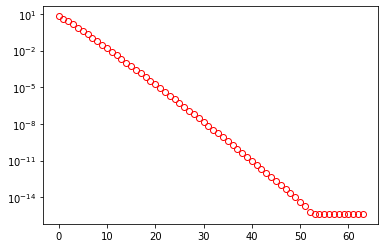

In [10]:
plt.plot(s,'ro',mfc='none'); plt.yscale('log');